In [ ]:
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import eigsh
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator as op
from functools import reduce
import time

In [ ]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

In [ ]:
def binary_to_comb(num):
  a=[]
  for i in range(len(num)):
    if num[i]=='1': a.append(i)
  
  print(a)
  comb=0
  for i in range(len(a)):
    comb+=ncr(a[i],i)
  return comb

In [ ]:
def choose2num(thelist):
    n = len(thelist)
    k = sum([int(i) for i in thelist]) # total number of 1's
    if ((n==0) or (k==0) or (n==k)): 
        return 0 # base cases of form [], [0,0,...] or [1,1,...]
    num = 0
    for firstbit in range(n-k+1):
        if (thelist[firstbit] == '1'):
            return num + choose2num(thelist[firstbit+1:])
        num += ncr(n-firstbit-1,k-1)

def num2choose(num,n,k):
    if (n < k) or (k < 0): raise ValueError("num2choose: " + str(n) + ", " + str(k))
    if (n==k): return '1'*n  # base case of form [1,1,...]
    if (k==0): return '0'*n  # base case of form [0,0,...]
    num %= ncr(n,k)
    thedigit = 0
    sum = 0
    for thedigit in range(n-k+1):
        oldsum = sum
        sum += ncr(n-1-thedigit,k-1)
        if (num < sum):
            return '0'*thedigit + '1' + num2choose(num-oldsum, n-(thedigit+1),k-1)

In [ ]:
num2choose(95,10,3), choose2num(['0', '0', '0', '1', '0', '0', '1', '0', '1', '0'])

('0001001010', 95)

In [ ]:
def Hamiltonian(H,U,n,m):
  k=ncr(2*n, m) #total no. of states

  for i in range(k):
    key=num2choose(i,2*n,m)
    key=(2*n-len(key))*'0' + key #Appending additional zeros in the beginning
    #print(i,key)
    key=[x for x in key]

    #Calculate Self-interaction energies
    for j in range(0,2*n,2):
      if key[j]=='1' and key[j+1]=='1':
        H[i,i]+=U
    
    #Calculate Hopping energies
    for j in range(2*n):
      if key[j]=='1':
        #Hopp right
        new_key=key.copy()
        new_key[j]='0'
        if j+2<2*n and key[j+2]=='0':
          new_key[j+2]='1'
          str1=""
          new_key=str1.join(new_key)
          H[i,choose2num(new_key)]=t
          #print('right: ', str1.join(key), new_key)

        #Hopp left
        new_key=key.copy()
        new_key[j]='0'
        if j-2>=0 and key[j-2]=='0':
          new_key[j-2]='1'
          str1=""
          new_key=str1.join(new_key)
          H[i,choose2num(new_key)]=t
          #print('left: ', str1.join(key), new_key)

  return H

In [ ]:
def Hubbard(t,U,n,m):
  k=ncr(2*n, m) #total no. of states

  H = lil_matrix((k,k))
  #tm=time.time()
  H=Hamiltonian(H,U,n,m)
  #print(time.time()-tm)

  #plt.spy(H,markersize=0.1)
  #plt.show()
  tm=time.time()
  l,v=eigsh(H, 1, which='SA') #Only one eigenvalue
  print("U: ",U,"  m: ",m,"  ", time.time()-tm)

  return l, v[:,0]

In [ ]:
def most_stable_config(gs,n,m):  #Most stable configurations
  print("Most stable configurations:")

  keys=np.argsort(np.abs(gs))

  for i in range(-1,-5,-1):
    temp=num2choose(keys[i],2*n,m)
    temp=(2*n-len(temp))*'0' + temp
    print(temp, round(gs[keys[i]],3))

In [ ]:
def magnetization(gs,n,m):
  l=len(gs)
  net_mag=0
  for i in range(l):
    state_mag=0
    temp=num2choose(i,2*n,m)
    temp=(2*n-len(temp))*'0' + temp

    for j in range(2*n):
      if j%2==0 and temp[j]=='1': state_mag+=1
      elif j%2==1 and temp[j]=='1': state_mag-=1
    net_mag+=(gs[i]**2)*np.abs(state_mag)
  return net_mag

In [ ]:
def neel(gs,n,m):
  l=len(gs)
  net_mag=0
  for i in range(l):
    state_mag=0
    temp=num2choose(i,2*n,m)
    temp=(2*n-len(temp))*'0' + temp

    for j in range(2*n):
      phi=(-1)**(j//2)
      if j%2==0 and temp[j]=='1': state_mag+=phi
      elif j%2==1 and temp[j]=='1': state_mag-=phi

    net_mag+=(gs[i]**2)*np.abs(state_mag)
  return net_mag

In [ ]:
def pairing_order(gs,n,m):
  

In [ ]:
t=-1
n=10 #no. of sites
U=np.arange(17)
m=np.arange(2,2*n,2)

In [ ]:
energies=np.zeros((17,n-1))
mag=np.zeros((17,n-1))
anti_mag=np.zeros((17,n-1))

In [ ]:
U=1
n=6
m=8
l,gs=Hubbard(t,U,n,m)
print(neel(gs,n,m), magnetization(gs,n,m))
most_stable_config(gs,n,m)

U:  1   m:  8    0.06946301460266113
1.5977734630130285 5.121339079824803e-30
Most stable configurations:
111001100111 0.146
110110011011 0.146
110011011011 0.142
111001110011 0.142


In [ ]:
for i in range(17):
  for j in range(n-1):
    tm=time.time()
    l,gs=Hubbard(t,U[i],n,m[j])
    print(l, magnetization(gs,n,m[j]), neel(gs,n,m[j]), time.time()-tm)
    energies[i,j]=l
    mag[i,j]=magnetization(gs,n,m[j])
    anti_mag[i,j]=neel(gs,n,m[j])

U:  0   m:  2    0.019079923629760742
[-3.83797189] 4.711417721500208e-31 1.953732314818879e-16 0.0809016227722168
U:  0   m:  4    0.9835379123687744
[-7.20298603] 7.444970559238662e-30 1.5685873601446347e-16 3.4273719787597656
U:  0   m:  6    11.179311037063599
[-9.82242896] 1.0582522593474085e-29 -5.534692708299669e-16 37.68216347694397
U:  0   m:  8    26.127853870391846
[-11.48408901] -2.243631130660805e-30 1.3139703335829974e-15 131.74454188346863
U:  0   m:  10    31.945151567459106
[-12.05334837] 3.180893505569224e-32 3.859578722741694e-15 208.00498342514038
U:  0   m:  12    24.392521381378174
[-11.48408901] 1.0774953034389777e-30 8.676755015121548e-16 147.28683495521545
U:  0   m:  14    11.541495323181152
[-9.82242896] -1.2972576120704154e-29 -5.412294862413314e-17 47.78472447395325
U:  0   m:  16    1.0691771507263184
[-7.20298603] 8.331147395972723e-29 -1.425797854618955e-16 5.065149545669556
U:  0   m:  18    0.01842355728149414
[-3.83797189] 2.582168491396942e-29 -2.226

KeyboardInterrupt: ignored

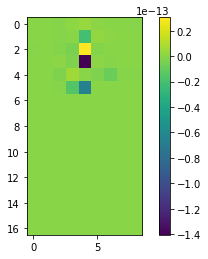

In [ ]:
plt.imshow(anti_mag)
plt.colorbar()